In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import pymysql


In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-11-19').filter(Measurement.date <= '2017-11-19').order_by(Measurement.date).all()
last_12_months

[('2016-11-19', 0.03),
 ('2016-11-19', 0.11),
 ('2016-11-19', 0.13),
 ('2016-11-19', 0.11),
 ('2016-11-20', 0.05),
 ('2016-11-20', 0.11),
 ('2016-11-20', 0.4),
 ('2016-11-20', 0.39),
 ('2016-11-20', None),
 ('2016-11-21', 0.01),
 ('2016-11-21', 0.02),
 ('2016-11-21', None),
 ('2016-11-21', 0.07),
 ('2016-11-21', 0.11),
 ('2016-11-21', 2.87),
 ('2016-11-22', 0.13),
 ('2016-11-22', 0.41),
 ('2016-11-22', None),
 ('2016-11-22', None),
 ('2016-11-22', 0.31),
 ('2016-11-22', 2.05),
 ('2016-11-22', 2.11),
 ('2016-11-23', 0.14),
 ('2016-11-23', 0.03),
 ('2016-11-23', None),
 ('2016-11-23', 0.03),
 ('2016-11-23', 0.25),
 ('2016-11-23', 0.22),
 ('2016-11-24', 0.05),
 ('2016-11-24', 0.2),
 ('2016-11-24', 0.21),
 ('2016-11-24', 0.3),
 ('2016-11-24', 0.72),
 ('2016-11-25', 0.05),
 ('2016-11-25', 0.05),
 ('2016-11-25', None),
 ('2016-11-25', 0.11),
 ('2016-11-25', 0.08),
 ('2016-11-25', 1.03),
 ('2016-11-26', 0.05),
 ('2016-11-26', 0.05),
 ('2016-11-26', 0.02),
 ('2016-11-26', 0.03),
 ('2016-11-26'

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= '2016-11-19').filter(Measurement.date <= '2017-11-19').order_by(Measurement.date).all()
last_12_months

[('2016-11-19', 75.0),
 ('2016-11-19', 73.0),
 ('2016-11-19', 76.0),
 ('2016-11-19', 73.0),
 ('2016-11-20', 76.0),
 ('2016-11-20', 75.0),
 ('2016-11-20', 80.0),
 ('2016-11-20', 75.0),
 ('2016-11-20', 74.0),
 ('2016-11-21', 76.0),
 ('2016-11-21', 75.0),
 ('2016-11-21', 73.0),
 ('2016-11-21', 75.0),
 ('2016-11-21', 73.0),
 ('2016-11-21', 71.0),
 ('2016-11-22', 75.0),
 ('2016-11-22', 76.0),
 ('2016-11-22', 76.0),
 ('2016-11-22', 76.0),
 ('2016-11-22', 76.0),
 ('2016-11-22', 75.0),
 ('2016-11-22', 73.0),
 ('2016-11-23', 72.0),
 ('2016-11-23', 75.0),
 ('2016-11-23', 77.0),
 ('2016-11-23', 75.0),
 ('2016-11-23', 74.0),
 ('2016-11-23', 69.0),
 ('2016-11-24', 74.0),
 ('2016-11-24', 75.0),
 ('2016-11-24', 75.0),
 ('2016-11-24', 75.0),
 ('2016-11-24', 69.0),
 ('2016-11-25', 75.0),
 ('2016-11-25', 76.0),
 ('2016-11-25', 74.0),
 ('2016-11-25', 76.0),
 ('2016-11-25', 74.0),
 ('2016-11-25', 69.0),
 ('2016-11-26', 73.0),
 ('2016-11-26', 76.0),
 ('2016-11-26', 78.0),
 ('2016-11-26', 78.0),
 ('2016-11-

In [11]:
# Calculate the date 1 year ago from today
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date).all()
prcp_score


[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp_score = pd.DataFrame(data=prcp_score)
df_prcp_score.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [14]:
# Sort the dataframe by date
df_prcp_score.set_index('date').head()



,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


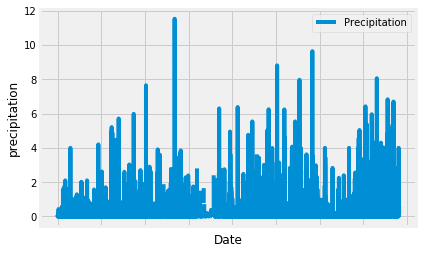

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df_prcp_score.plot('date', 'prcp')
plt.xlabel('Date')
plt.ylabel('precipitation')
plt.legend((["Precipitation"]), loc="upper right")
plt.tight_layout
plt.show()
# Rotate the xticks for the dates

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp_score.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [17]:
# How many stations are available in this dataset?
#station_count = session.query(Station.station, func.count(Station.station)).group_by(Station.station).all()
#station_count
sation_count = session.query(Station.station).count()
sation_count

9

In [18]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
station_names = session.query(Measurement.station).group_by(Measurement.station).all()
station_names

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?
temp_high_low = most_active_stations[0][0]
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == temp_high_low).all()




[(85.0, 54.0, 71.66378066378067)]

In [ ]:
most_active_station = most_active_stations[0]
most_active_station

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


high_obs = session.query(Measurement.tobs).\
    filter(Measurement.date > last_year).\
    filter(Measurement.station == most_obs).\
    order_by(Measurement.date).all()





In [ ]:

# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(high_obs)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + most_obs)
plt.show()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
arrival = dt.date(2018, 8, 12)
depart = dt.date(2018, 8, 20)
last_year =  dt.timedelta(days=365)
temp_avg = (calc_temps((arrival-last_year), (depart-last_year)))
temp_avg

# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(temp_avg))
ax.boxplot(temp_avg, patch_artist=True)
ax.set_title('Trip Avg Temperature ')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
